### Regression with TensorFlow

In [1]:
!pip install opendatasets


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24040\766860265.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
#od.download('https://www.kaggle.com/datasets/andonians/random-linear-regression')

In [5]:
data=pd.read_csv("data/dataset.csv")

In [6]:
data

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [7]:
data.shape

(300, 2)

In [9]:
X=data['x']
y=data['y']

In [10]:
X

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64

In [11]:
y

0      79.775152
1      23.177279
2      25.609262
3      17.857388
4      41.849864
         ...    
295    68.545888
296    47.334876
297    54.090637
298    63.297171
299    52.459467
Name: y, Length: 300, dtype: float64

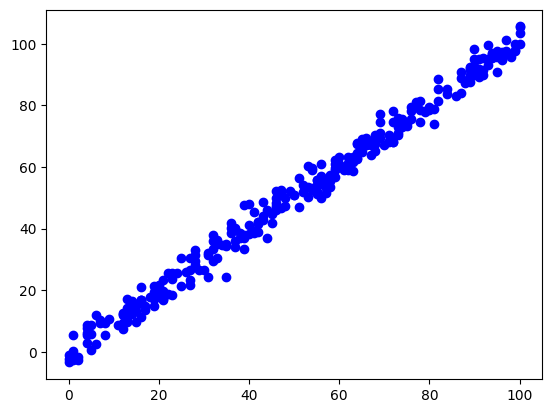

In [12]:
plt.scatter(X,y,c='b')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, X_test.shape

((240,), (60,))

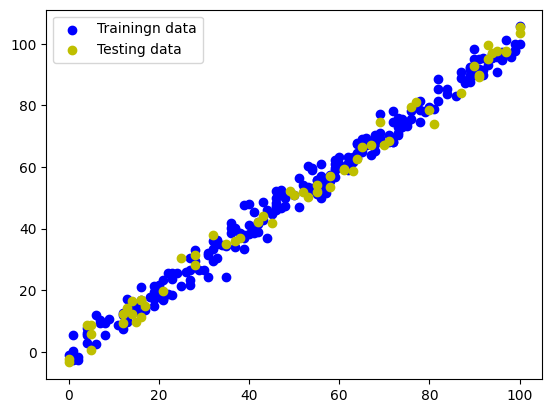

In [15]:
plt.scatter(X_train,y_train, c='b', label='Trainingn data')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.legend()
plt.show()

<h5>Model Building</h5>

In [54]:
# create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.05),
              metrics=['mae'])

# train model
epoch_number=10
history=model.fit(tf.expand_dims(X_train,axis=1),y_train, epochs=epoch_number)

Epoch 1/10
8/8 [==============================] - 0s 1ms/step - loss: 58.0946 - mae: 58.0946
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 50.0746 - mae: 50.0746
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 41.9522 - mae: 41.9522
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: 34.0279 - mae: 34.0279
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 25.8858 - mae: 25.8858
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 17.7020 - mae: 17.7020
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: 9.6566 - mae: 9.6566
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 3.2131 - mae: 3.2131
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 4.2977 - mae: 4.2977
Epoch 10/10
8/8 [==============================] - 0s 1ms/step - loss: 3.2700 - mae: 3.2700


In [55]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                128       
                                                                 
 dense_36 (Dense)            (None, 1)                 65        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
y_predictions=model.predict(X_test)
y_predictions[:5]

2/2 [==============================] - 0s 4ms/step


array([[90.00365  ],
       [76.10434  ],
       [93.97487  ],
       [ 5.6150126],
       [90.996445 ]], dtype=float32)

In [57]:
y_test.head(5)

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

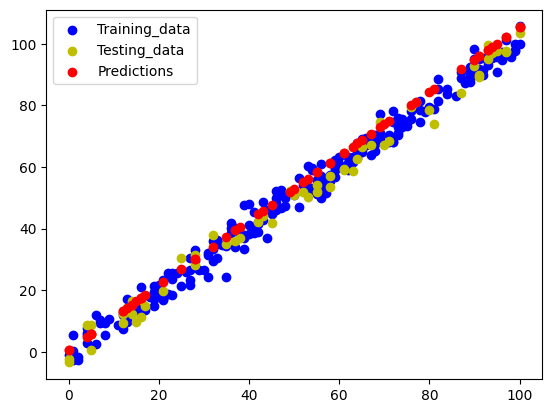

In [48]:
plt.scatter(X_train,y_train,c='b', label='Training_data')
plt.scatter(X_test, y_test,c='y', label='Testing_data')
plt.scatter(X_test,y_predictions,c='r',label='Predictions')
plt.legend()
plt.show()

In [58]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 2.5742 - mae: 2.5742


[2.5742127895355225, 2.5742127895355225]

In [59]:
# Using MAE (Mean Absolute Error)
mae=tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_predictions))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.5742126>

In [60]:
y_predictions.shape

(60, 1)

In [61]:
tf.squeeze(y_predictions).shape

TensorShape([60])

In [62]:
# Using MSE (Mean Squared Error)
mse=tf.metrics.mean_squared_error(y_test, tf.squeeze(y_predictions))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=9.794221>

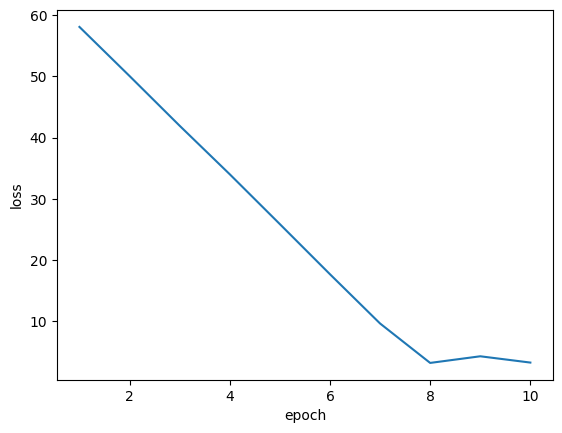

In [63]:
x_range=range(1,epoch_number+1)
loss=history.history['loss']
plt.plot(x_range,loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [64]:
for layer in model.layers:
    weights=layer.get_weights()[0]
    biases=layer.get_weights()[1]
    print(f"\nWeights:\n{weights}\nBiases:\n{biases}")


Weights:
[[ 0.2090734   0.0743795  -0.22841999 -0.08422643 -0.03245607  0.23317814
  -0.15589777 -0.32695174  0.12698157 -0.28512377 -0.08685166  0.0840518
   0.06804682  0.2582874  -0.19204512  0.13884813 -0.01835498  0.14875475
   0.16183189 -0.17742857  0.32000697  0.03546354  0.3439929  -0.01029716
  -0.21910807 -0.12360193  0.16760138  0.14740352  0.00086577 -0.36422324
  -0.10848568  0.18270102 -0.3274686   0.12486764 -0.27379718  0.10429628
  -0.21200895 -0.04891131  0.11655129 -0.33399725  0.0013747  -0.19754975
   0.19466725 -0.17878734  0.02207448 -0.21131618  0.26047555 -0.17019764
   0.13631533 -0.1870072   0.10785939  0.09665706 -0.15669915 -0.03716583
  -0.02693457  0.01371405  0.02340843 -0.21138054 -0.05212225  0.29374966
  -0.2723956   0.2427697   0.28160542  0.01040862]]
Biases:
[ 0.06044896 -0.05730152  0.05344447  0.04602642 -0.05268132 -0.03784434
 -0.06159808 -0.06208016 -0.05702528 -0.06051327 -0.06311765  0.06041439
  0.06089193  0.06215366  0.05373573 -0.05660